In [1]:
!pip install texify

^C


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu118 requires torch==2.1.0+cu118, but you have torch 2.5.1 which is incompatible.


  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --------------------- ------------------ 1.6/2.9 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 8.9 MB/s eta 0:00:00
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/203.1 MB 11.7 MB/s eta 0:00:18
    --------------------------------------- 4.7/203.1 MB 11.9 MB/s eta 0:00:17
   - -------------------------------------- 7.3/203.1 MB 11.6 MB/s eta 0:00:17
   - -------------------------------------- 9.4/203.1 MB 11.3 MB/s eta 0:00:18
   -- ------------------------------------- 11.8/203.1 MB 11.2 MB/s eta 0:00:18
   -- ------------------------------------- 14.2/203.1 MB 11.1 MB/s eta 0:00:17
   --- ------------------------------------ 16.5/203.1 MB 11.2 MB/s eta 0:00:17
   --- ------------------

In [7]:
import cv2
from pdftolatex.block_detector import segment

img = cv2.imread('test.png')
bboxes = segment(img, True, False)

In [8]:
import numpy as np

print(img.shape) 

page_img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

box = bboxes[2]
print(box.x, box.y, box.width, box.height)

(482, 664, 3)
177 104 294 47


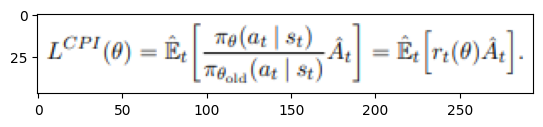

In [9]:
import matplotlib.pyplot as plt

img_part = page_img[box.y:box.y+box.height, box.x:box.x+box.width, :]
plt.imshow(img_part)
plt.show()

In [10]:
# import pytesseract

# content = pytesseract.image_to_data(img_part, output_type=pytesseract.Output.DICT)
# " ".join(content['text'])
import os

os.environ["HTTPS_PROXY"] = "http://localhost:7890"
os.environ["HTTP_PROXY"] = "http://localhost:7890"

from texify.inference import batch_inference
from texify.model.model import load_model
from texify.model.processor import load_processor
from PIL import Image

model = load_model()
processor = load_processor()

Loaded texify model to cuda with torch.float16 dtype


In [11]:
img = Image.fromarray(img_part)
# img = Image.open("test.png") # Your image name here
results = batch_inference([img], model, processor)
print(results[0])

$${\cal L}^{C P I}(\theta)=\hat{\mathbb{E}}_{t}\bigg[\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}\hat{A}_{t}\bigg]=\hat{\mathbb{E}}_{t}\Big[r_{t}(\theta)\hat{A}_{t}\Big].$$


$${\cal L}^{C P I}(\theta)=\hat{\mathbb{E}}_{t}\bigg[\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}\hat{A}_{t}\bigg]=\hat{\mathbb{E}}_{t}\Big[r_{t}(\theta)\hat{A}_{t}\Big].$$

In [6]:
print(results[0])

$$\left[L^{C P I}(\theta)={\hat{\mathbb{E}}}_{t}\left[{\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}}{\hat{A}}_{t}\right]={\hat{\mathbb{E}}}_{t}\left[r_{t}(\theta){\hat{A}}_{t}\right].\right]$$


#### png -> jpg

In [2]:
from PIL import Image

# 打开PNG图像
png_image = Image.open("doc/pic.png")

# 将图像转换为RGB模式（如果它不是的话）
rgb_image = png_image.convert('RGB')

# 保存为JPG格式
rgb_image.save("doc/detecting_steps.jpg", "JPEG")

print("转换完成！")

转换完成！
